In [1]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466352 entries, 0 to 42537
Data columns (total 50 columns):
id                            7 non-null object
member_id                     0 non-null float64
loan_amnt                     466345 non-null float64
funded_amnt                   466345 non-null float64
funded_amnt_inv               466345 non-null float64
term                          466345 non-null object
int_rate                      466345 non-null object
installment                   466345 non-null float64
grade                         466345 non-null object
sub_grade                     466345 non-null object
emp_title                     438746 non-null object
emp_length                    445327 non-null object
home_ownership                466345 non-null object
annual_inc                    466341 non-null float64
verification_status           466345 non-null object
issue_d                       466345 non-null object
loan_status                   466345 non-null 

In [2]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df=df.loc[termfilter]

In [3]:
#gradefilter=(df['grade']=='C') #&(df.loan_status=='Fully Paid')
#df1=df[gradefilter]
#df12=df1['total_pymnt'].sum()
#df23=df1['funded_amnt'].sum()
#df12/df23

In [4]:
#statusfilter=(df['loan_status']!='Current')
#df[statusfilter].groupby('loan_status')['loan_status'].count()
#df=df[statusfilter]

In [5]:
#gradefilter=df['grade']=='C'
#df=df[gradefilter]
#df

In [6]:
#Charge Off Probability
Total=df.groupby(['term'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['term'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df3

term
 36 months    0.13
 60 months    0.23
Name: funded_amnt, dtype: float64

In [7]:
a7=df.pivot_table(index='term',values='funded_amnt',aggfunc=sum)
a7=a7.sort_values('funded_amnt',ascending=False)
c7=a7.reset_index()
d7=c7['term']
b7=c7['funded_amnt']
print(list(d7))
print(list(b7))

[' 36 months', ' 60 months']
[4122438750.0, 2542399750.0]


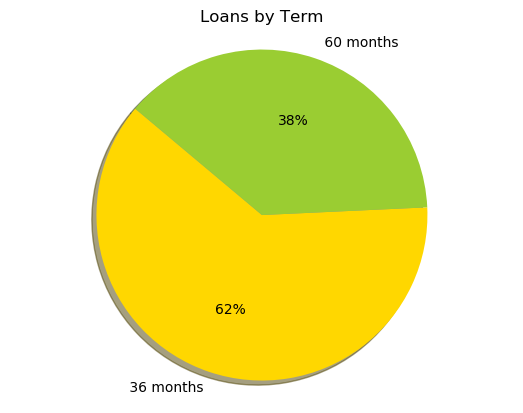

In [31]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(d7)
sizes = list(b7)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','palegreen','bisque','mediumturquoise','cadetblue','magenta','crimson','goldenrod']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=140)

#plt.rcParams['font.size'] = 10.0

plt.title('Loans by Term')
 
plt.axis('equal')
#plt.subplots_adjust(top=.6, bottom=.1, left=.1, right=.5, hspace=1,
 #                   wspace=.5)
plt.show()
#create other

In [23]:
#Charge Off Probability
Total=df.groupby(['term'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['term'])['funded_amnt'].count()
df3=(df2/Total).round(2).dropna()
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['term']
CO=df4['funded_amnt']
#df4['funded_amnt'] = pd.Series(["{:}".format(val) for val in df['funded_amnt']])
df5=df4['funded_amnt']#.style.format("{:.2}%")
#df6=pd.DataFrame(df5*100)
#df6=df6.styler({'%'})
#CO=df6['funded_amnt']
#CO=df6
#find out how to name the columns
#sort by default

In [11]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

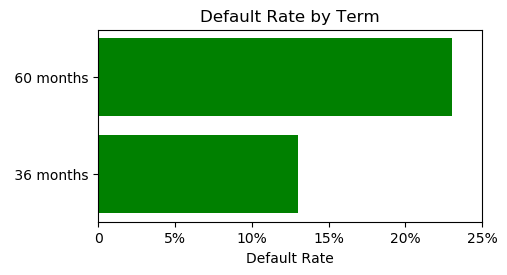

In [38]:
import matplotlib.ticker as ticker
#from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by State')
ax.set_xlim(0,.25)
#plt.subplots_adjust(top=1, bottom=.7, left=.5, right=1, hspace=1,
 #                   wspace=.5)
#ax.get_xaxis().get_major_formatter("{:}").set_useOffset(False)
#matplotlib.get_xaxis().set_major_formatter(
 #   matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.subplots_adjust(top=.5, bottom=.1, left=.1, right=.7, hspace=1,
                    wspace=.5)
#plt.rcParams['font.size'] = 10.0
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Default Rate by Term')
plt.show()

In [26]:
df.groupby('loan_status')['loan_status'].count()

loan_status
Charged Off                                             72396
Current                                                 36696
Default                                                    11
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             351270
In Grace Period                                          1066
Late (16-30 days)                                         321
Late (31-120 days)                                       1836
Name: loan_status, dtype: int64

In [ ]:
df['performance']=(df['total_pymnt']/df['funded_amnt'])-1

In [ ]:
#df filter for 36 month term
df['term']=df['term'].astype('str')
termfilter36= df['term'].str.contains('36')
termfilter60= df['term'].str.contains('60') 
df36=df.loc[termfilter36]
df60=df.loc[termfilter60]

pf = df36['performance']
pf1=df60['performance']

import scipy.stats as st
st.ttest_ind(pf1,pf)

In [ ]:
df60['performance'].mean()

In [ ]:
df36['performance'].mean()

In [ ]:
df['performance']=(df['total_pymnt']-df['collection_recovery_fee']) / (df['funded_amnt']) - 1

In [ ]:
#charge off by purpose. #first 180 day charge off by purpose 
#charge off = charge off filter / total
#charge off 180 days = charge off 180 day (or 90 day First Payer Default) filter / total